# Homework
## Problems [Part 1](./01_Linear-Algebra.md)

1. Consider the following pistons connected in series. You want to find
   the distance each piston moves when equal and opposite forces are
   applied to each side. In case 1, you consider the motion of all five
   pistons, but in case 2 you set the motion of piston 5 to 0. 

![Springs-masses](../images/series-springs_01-02.png)

Using a FBD for each piston, in case 1:

$k_1x_{1}-k_2x_{2}=F$

$(k_1 +k_2)x_2 -k_1x_1 - k_2x_3 = 0$

$(k_2 +k_3)x_3 -k_2x_2 - k_3x_4 = 0$

$(k_3 +k_4)x_4 -k_3x_3 - k_4x_5 = 0$

$k_4x_5 - k_4x_4 = -F$

in matrix form:

$\left[ \begin{array}{ccccc}
k_1 & -k_1 & 0 & 0 & 0\\
-k_1 & k_1+k_2 & -k_2 & 0 & 0 \\
0 & -k_2 & k_2+k_3 & -k_3 & 0\\
0 & 0 & -k_3 & k_3+k_4 & -k_4\\
0 & 0 & 0 & -k_4 & k_4  
\end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \\
x_{5}\end{array} \right]=
\left[ \begin{array}{c}
F \\
0 \\
0 \\
0 \\
-F \end{array} \right]$

Try to use `np.linalg.solve` to find the piston x-positions. Do you get
any warnings or errors? _use stiffness values of $k_* = 1$ and force of
$F=1$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve
from scipy.optimize import curve_fit

In [2]:
k = 1
F = 1

A = np.array([[k+k, -k, 0, 0, 0],
              [-k, k+k, -k, 0, 0],
              [0, -k, k+k, -k, 0],
              [0, 0, -k, k+k, -k],
              [0, 0, 0, -k, k]])

B = np.array([F, 0, 0, 0, -F])

try:
    x_positions = np.linalg.solve(A, B)
except Exception as e:
    error_message = str(e)
    x_positions = None

print("The piston x positions are: ",x_positions)
'''No error'''

The piston x positions are:  [-1.11022302e-16 -1.00000000e+00 -2.00000000e+00 -3.00000000e+00
 -4.00000000e+00]


'No error'

Now, consider case 2, 

Using a FBD for each piston, in case 2:

$k_1x_{1}-k_2x_{2}=F$

$(k_1 +k_2)x_2 -k_1x_1 - k_2x_3 = 0$

$(k_2 +k_3)x_3 -k_2x_2 - k_3x_4 = 0$

$(k_3 +k_4)x_4 -k_3x_3 = 0$

in matrix form:

$\left[ \begin{array}{cccc}
k_1 & -k_1 & 0 & 0 \\
-k_1 & k_1+k_2 & -k_2 & 0 \\
0 & -k_2 & k_2+k_3 & -k_3 \\
0 & 0 & -k_3 & k_3+k_4 \\
\end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
F \\
0 \\
0 \\
0 \end{array} \right]$

Try to use `np.linalg.solve` to find the piston x-positions. Do you get
any warnings or errors? Why does this solution work better [hint: check
condition
numbers](./01_Linear-Algebra.md#Singular-and-ill-conditioned-matrices)

In [3]:
A_case2 = np.array([[k, -k, 0, 0],
                    [-k, k+k, -k, 0],
                    [0, -k, k+k, -k],
                    [0, 0, -k, k+k]])

B_case2 = np.array([F, 0, 0, 0])

try:
    x_positions_case2 = np.linalg.solve(A_case2, B_case2)
    condition_number_case2 = np.linalg.cond(A_case2)
    warning_or_error_case2 = "No warnings or errors"
    
except Exception as e:
    warning_or_error_case2 = str(e)
    condition_number_case2 = None
    x_positions_case2 = None
    
print("The piston x positions are: ",x_positions_case2)
print("The condition number is: ",condition_number_case2)
'''No errors. This solve works better due to the fact that this matrix has a lower and more stable condition number'''

The piston x positions are:  [4. 3. 2. 1.]
The condition number is:  29.28405223595455


'No errors. This solve works better due to the fact that this matrix has a lower and more stable condition number'

![HVAC diagram showing the flow rates and connections between floors](../images/hvac.png)

2. In the figure above you have an idealized Heating, Ventilation and
   Air conditioning (HVAC) system. In the current configuration, the
   three-room building is being cooled off by $T_{in}$ air fed into the
   building at $\dot{m}_1. Our goal is to determine the steady-state temperatures of the rooms given the following information

* $\dot{m}_1=0.1~kg/s$
* $\dot{m}_2=0.12~kg/s$
* $\dot{m}_3=0.12~kg/s$
* $\dot{m}_4=0.1~kg/s$
* $\dot{m}_5=0.02~kg/s$
* $\dot{m}_6=0.02~kg/s$
* $C_p=1000~\frac{J}{kg-K}$
* $\dot{Q}_{in} = 300~W$
* $T_{in} = 12^{o} C$

The energy-balance equations for rooms 1-3 create three equations:

1. $\dot{m}_1 C_p T_{in}+\dot{Q}_{in}-\dot{m}_2 C_p T_{1}+\dot{m}_6 C_p T_{2} = 0$

2. $\dot{m}_2 C_p T_{1}+\dot{Q}_{in}+\dot{m}_5 C_p T_{3}-\dot{m}_3 C_p T_{2}-\dot{m}_6 C_p T_{2} = 0$

3. $\dot{m}_3 C_p T_{2}+\dot{Q}_{in}-\dot{m}_5 C_p T_{3}-\dot{m}_4 C_p T_{3} = 0$

Identify the unknown variables and constants to create a linear algebra problem in the form of $\mathbf{Ax}=\mathbf{b}$.

a. Create the matrix $\mathbf{A}$

b. Create the known vector $\mathbf{b}$

c. Solve for the unknown variables, $\mathbf{x}$

d. What are the warmest and coldest rooms? What are their temperatures?

In [4]:
m_dot = [0.1, 0.12, 0.12, 0.1, 0.02, 0.02]  
Cp = 1000 
Q_in = 300  
T_in = 12  

#Part a
A = np.array([
    [m_dot[0]*Cp, -m_dot[1]*Cp, 0],
    [-m_dot[0]*Cp, (m_dot[1]+m_dot[2])*Cp, -m_dot[2]*Cp],
    [0, -m_dot[2]*Cp, (m_dot[2]+m_dot[3])*Cp]
])

print("Matrix A: ")
print(A)

Matrix A: 
[[ 100. -120.    0.]
 [-100.  240. -120.]
 [   0. -120.  220.]]


In [5]:
#Part b
b = np.array([
    Q_in + m_dot[5]*Cp*T_in,
    Q_in - m_dot[5]*Cp*T_in,
    Q_in - m_dot[4]*Cp*T_in
])

print("Known vector b: ")
print(b)

Known vector b: 
[540.  60.  60.]


In [6]:
#Part c
x = np.linalg.solve(A, b)

print("Solved unknown variables: ",x)

Solved unknown variables:  [19.32 11.6   6.6 ]


In [7]:
#Part d
warmest_room_temp = np.max(x)
coldest_room_temp = np.min(x)
warmest_room = np.argmax(x) + 1  #Adding 1 to match room numbering starting from 1
coldest_room = np.argmin(x) + 1

print("Warmest room: ",warmest_room,", Warmest temp: ", warmest_room_temp)
print("Coldest room: ",coldest_room,", Coldest temp: ", coldest_room_temp)

Warmest room:  1 , Warmest temp:  19.32
Coldest room:  3 , Coldest temp:  6.6


3. The [Hilbert Matrix](https://en.wikipedia.org/wiki/Hilbert_matrix) has a high condition number and as the matrix increases dimensions, the condition number increases. Find the condition number of a 

a. $1 \times 1$ Hilbert matrix

b. $5 \times 5$ Hilbert matrix

c. $10 \times 10$ Hilbert matrix

d. $15 \times 15$ Hilbert matrix

e. $20 \times 20$ Hilbert matrix

If the accuracy of each matrix element is $\approx 10^{-16}$, what is the expected rounding error in the solution $\mathbf{Ax} = \mathbf{b}$, where $\mathbf{A}$ is the Hilbert matrix.

In [8]:
def hilbert_matrix(n):
    return np.array([[1.0 / (i + j - 1) for j in range(1, n+1)] for i in range(1, n+1)])

# Calculate condition numbers for Hilbert matrices of sizes 1x1, 5x5, 10x10, 15x15, and 20x20
sizes = [1, 5, 10, 15, 20]
condition_numbers = {size: np.linalg.cond(hilbert_matrix(size)) for size in sizes}

errors = {size: cond * 1e-16 for size, cond in condition_numbers.items()}

print("Matrix condition number (1 = 1x1 matrix): ")
print(condition_numbers)

print("Matrix errors (1 = 1x1 matrix): ")
print(errors)

'''The expected rounding error for the solution to Ax=b would be A*10^-16. The condition number scales the error.'''

Matrix condition number (1 = 1x1 matrix): 
{1: 1.0, 5: 476607.2502425855, 10: 16024416987428.36, 15: 3.67568286586649e+17, 20: 1.1484020388436145e+18}
Matrix errors (1 = 1x1 matrix): 
{1: 1e-16, 5: 4.766072502425855e-11, 10: 0.001602441698742836, 15: 36.7568286586649, 20: 114.84020388436144}


'The expected rounding error for the solution to Ax=b would be A*10^-16. The condition number scales the error.'

## Problems [Part 2](./02_Gauss_elimination.md)

1. 4 masses are connected in series to 4 springs with K=100N/m. What are the final positions of the masses? 

![Springs-masses](../images/mass_springs.png)

The masses haves the following amounts, 1, 2, 3, and 4 kg for masses 1-4. Using a FBD for each mass:

$m_{1}g+k(x_{2}-x_{1})-kx_{1}=0$

$m_{2}g+k(x_{3}-x_{2})-k(x_{2}-x_{1})=0$

$m_{3}g+k(x_{4}-x_{3})-k(x_{3}-x_{2})=0$

$m_{4}g-k(x_{4}-x_{3})=0$

in matrix form K=100 N/m:

$\left[ \begin{array}{cccc}
2k & -k & 0 & 0 \\
-k & 2k & -k & 0 \\
0 & -k & 2k & -k \\
0 & 0 & -k & k \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
m_{1}g \\
m_{2}g \\
m_{3}g \\
m_{4}g \end{array} \right]$

In [9]:
k = 100 
masses = [1, 2, 3, 4]  
g = 9.81  

A = np.array([
    [2*k, -k, 0, 0],
    [-k, 2*k, -k, 0],
    [0, -k, 2*k, -k],
    [0, 0, -k, k]
])

b = np.array([masses[i] * g for i in range(4)])

x = np.linalg.solve(A, b)

print("Position of m1: ",x[0], "m")
print("Position of m2: ",x[1], "m")
print("Position of m3: ",x[2], "m")
print("Position of m4: ",x[3], "m")

Position of m1:  0.9810000000000008 m
Position of m2:  1.8639000000000014 m
Position of m3:  2.5506000000000024 m
Position of m4:  2.9430000000000023 m


![Triangular truss](../images/truss.png)

For problems __2-3__, consider the simple 3-element triangular truss, shown above, with a point load applied at the tip. The goal is to understand what tension is in the horizontal element, $P_1$. In problem __2__, the applied force is verical $(\theta=0)$ and in problem __3__ the applied force varies in angle $(\theta \neq 0)$. 

2. In the truss shown above, calculate the tension in bar 1, $P_1$, when $\theta=0$. When $\theta=0$, the $\sum F=0$ at each corner creates 3 equations and 3 unknowns as such (here, you reduce the number of equations with symmetry, $P_2=P_3,~R_2=R_3,~and~R_1=0$ ). 

$\left[ \begin{array}{ccc}
1 & \cos\alpha & 0 \\
0 & 2\sin\alpha & 0 \\
0 & -\sin\alpha &  1 \\
 \end{array} \right]
\left[ \begin{array}{c}
P_{1} \\
P_{2} \\
R_{2} \end{array} \right]=
\left[ \begin{array}{c}
0 \\
F \\
0 \end{array} \right]$

a. Create the system of equations, $\mathbf{Ax}=\mathbf{b}$, when $\alpha=75^o$, $\beta=30^o$, and $F=1~kN$. Use __Gauss elimination__ to solve for $P_1,~P_2,~and~R_2$. What is the resulting augmented matrix, $\mathbf{A|y}$ after Gauss elimination?

b. Solve for the $\mathbf{LU}$ decomposition of $\mathbf{A}$. 

c. Use the $\mathbf{LU}$ solution to solve for the tension in bar 1 $(P_1)$ every 10 N values of force, F, between 100 N and 1100 N. Plot $P_1~vs~F$.

In [10]:
#Part a
alpha_deg = 75
beta_deg = 30

alpha = np.radians(alpha_deg)
beta = np.radians(beta_deg)

F = 1  

A = np.array([[1, np.cos(alpha), 0],
              [0, np.sin(alpha), -np.sin(beta)],
              [0, -1, 1]])

b = np.array([0, F, 0])

#Perform Gaussian elimination (LU decomposition) on matrix A
lu, piv = lu_factor(A)

LU = lu.dot(A)

print("Resulting matrix: ")
print(LU)

Resulting matrix: 
[[ 1.          0.50881905 -0.12940952]
 [ 0.         -1.96592583  1.5       ]
 [ 0.         -1.39893853  0.94888874]]


In [11]:
#Part b
forces = np.linspace(100, 1100, 10)
tensions_P1 = []

for force in forces:
    b = np.array([0, force, 0])
    x = lu_solve((lu, piv), b) 
    tensions_P1.append(x[0])
    
print("LU decomposition: ")
print(x)

LU decomposition: 
[-611.04350424 2360.89080694 2360.89080694]


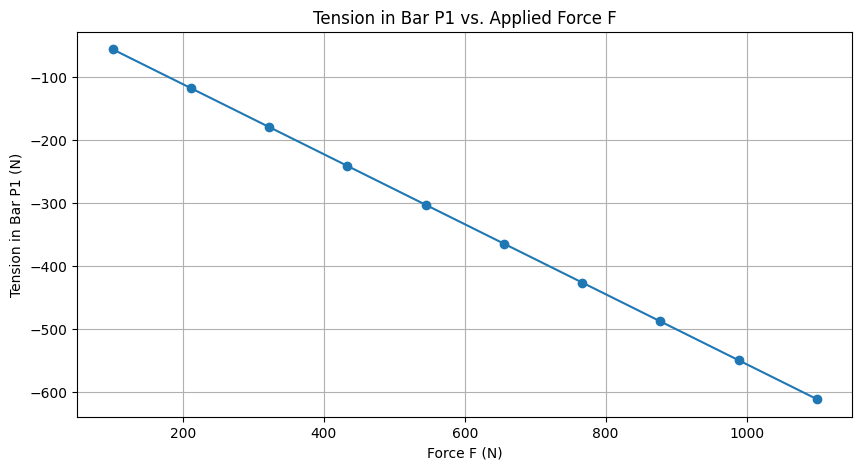

Tensions in bar 1 (P1): 
[-55.549409476594455, -117.2709755616994, -178.99254164680434, -240.71410773190928, -302.4356738170143, -364.15723990211916, -425.87880598722415, -487.6003720723291, -549.321938157434, -611.0435042425389]


In [12]:
#Part c
plt.figure(figsize=(10, 5))
plt.plot(forces, tensions_P1, marker='o')
plt.title('Tension in Bar P1 vs. Applied Force F')
plt.xlabel('Force F (N)')
plt.ylabel('Tension in Bar P1 (N)')
plt.grid(True)
plt.show()


print("Tensions in bar 1 (P1): ")
print(tensions_P1)

3. Using the same truss as shown above, let's calculate the tension in bar 1, $P_1$, when $\theta=[0...90^o]$ and $F=[100...1100]~kN$. When $\theta\neq 0$, the resulting 6 equations and 6 unknowns are given in the following matrix

$\left[ \begin{array}{ccc}
0 & \sin\alpha & 0 & 1 & 0 & 0 \\
1 & \cos\alpha & 0 & 0 & 1 & 0 \\
0 & \cos\beta/2 & \cos\beta/2 & 0 & 0 & 0 \\
0 & -\sin\beta/2 & \sin\beta/2 & 0 & 0 & 0 \\
-1 & 0 & \cos\alpha & 0 & 0 & 0 \\
0 & 0 & \sin\alpha & 0 & 0 & 1 \\
 \end{array} \right]
\left[ \begin{array}{c}
P_{1} \\
P_{2} \\
P_{3} \\
R_{1} \\
R_{2} \\
R_{3}\end{array} \right]=
\left[ \begin{array}{c}
0 \\
0 \\
F\cos\theta \\
-F\sin\theta \\
0 \\
0 \end{array} \right]$

a. Create the system of equations, $\mathbf{Ax}=\mathbf{b}$, when $\alpha=75^o$, $\beta=30^o$, $\theta=45^o=\pi/4$, and $F=1~kN$. Use __Gauss elimination__ to solve for $P_1,~P_2,~P_3,~R_1,~R_2,~and~R_3$. What is the resulting augmented matrix, $\mathbf{A|y}$ after Gauss elimination? _Hint: do you see a problem with the order of the equations? How can you __pivot__ to fix it?_

b. Solve for the $\mathbf{PLU}$ decomposition of $\mathbf{A}$. 

c. Use the $\mathbf{PLU}$ solution to solve for the tension in bar 1 $(P_1)$ every 10 N values of force, F, between 100 N and 1100 N. Plot $P_1~vs~F$.

In [13]:
#Part a
alpha_deg = 75
beta_deg = 30
theta_deg = 45 

alpha = np.radians(alpha_deg)
beta = np.radians(beta_deg)
theta = np.radians(theta_deg)

F = 1000 

A = np.array([
    [0, np.sin(alpha), 0, 1, 0, 0],
    [1, np.cos(alpha), 0, 0, 1, 0],
    [0, 0, np.cos(beta/2), np.cos(beta/2), 0, 0],
    [0, 0, -np.sin(beta/2), np.sin(beta/2), 0, 1],
    [-1, 0, np.cos(alpha), 0, 0, 0],
    [0, 0, np.sin(alpha), 0, 0, 1]
])

b = np.array([
    0,
    0,
    F * np.cos(theta),
    -F * np.sin(theta),
    0,
    0
])

#Before applying Gaussian elimination, we need to pivot the matrix A to prevent a zero from appearing in the pivot position in the first row.
#Swapping row 1 with a row below it that has a non-zero entry in the first column.

A[[0, 1]] = A[[1, 0]]
b[[0, 1]] = b[[1, 0]]

lu, piv = lu_factor(A)

print("Pivoted matrices: ")
print(lu)
print(piv)

Pivoted matrices: 
[[ 1.          0.25881905  0.          0.          1.          0.        ]
 [ 0.          0.96592583  0.          1.          0.          0.        ]
 [ 0.          0.          0.96592583  0.96592583  0.          0.        ]
 [ 0.          0.          1.         -0.96592583  0.          1.        ]
 [-1.          0.26794919  0.26794919  0.54535061  1.         -0.54535061]
 [ 0.          0.         -0.26794919 -0.53589838  0.          1.53589838]]
[0 1 2 5 4 5]


In [14]:
#Part b
forces = np.linspace(100, 1100, 10)
tensions_P1 = []

for force in forces:
    b_updated = np.array([
        0,
        0,
        force * np.cos(theta),
        -force * np.sin(theta),
        0,
        0
    ])
    x = lu_solve((lu, piv), b_updated)
    tensions_P1.append(x[0])
    
print("PLU decomposition: ")
print(x)

PLU decomposition: 
[ 172.05587537 -145.43873882  664.77285435  140.48303397 -134.41355987
 -642.12126864]


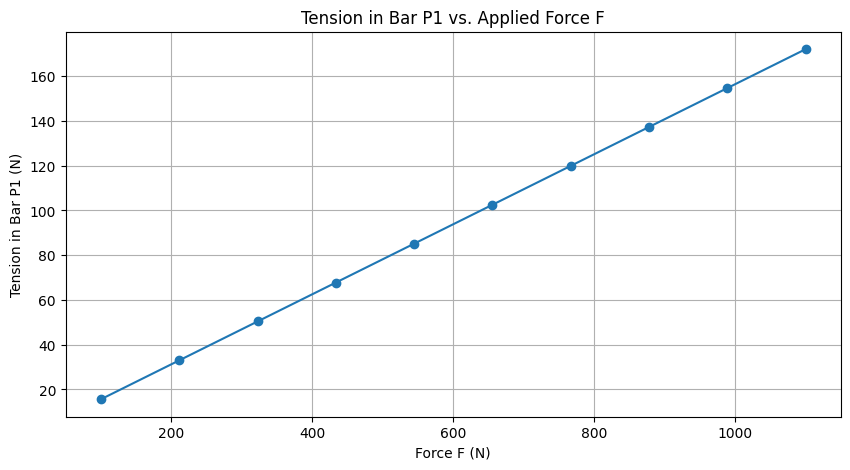

Tensions in bar 1 (P1): 
[15.641443215823761, 33.020824566739044, 50.40020591765434, 67.77958726856966, 85.15896861948492, 102.53834997040022, 119.91773132131553, 137.29711267223087, 154.67649402314606, 172.05587537406137]


In [15]:
#Part c
plt.figure(figsize=(10, 5))
plt.plot(forces, tensions_P1, marker='o')
plt.title('Tension in Bar P1 vs. Applied Force F')
plt.xlabel('Force F (N)')
plt.ylabel('Tension in Bar P1 (N)')
plt.grid(True)
plt.show()

print("Tensions in bar 1 (P1): ")
print(tensions_P1)

## Problems [Part 3](./03_Linear-regression-algebra.md)

<img
src="https://i.imgur.com/LoBbHaM.png" alt="prony series diagram"
style="width: 300px;"/> <img src="https://i.imgur.com/8i140Zu.png" alt
= "stress relax data" style="width: 400px;"/> 

Viscoelastic Prony series model and stress-vs-time relaxation curve of wheat kernels [[3]](https://www.cerealsgrains.org/publications/plexus/cfw/pastissues/2013/Documents/CFW-58-3-0139.pdf). Stress relaxation curve of a wheat kernel from regressed equation data that illustrate where to locate relaxation times (vertical dotted lines) and stresses (horizontal black marks). $\sigma$ = stress; t = time.

2. [Viscoelasticity](https://en.wikipedia.org/wiki/Viscoelasticity) is a property of materials that exhibit stiffness, but also tend to flow slowly. One example is [Silly Putty](https://en.wikipedia.org/wiki/Silly_Putty), when you throw a lump it bounces, but if you leave it on a table it _creeps_, slowly flowing downwards. In the stress-vs-time plot above, a wheat kernel was placed under constant strain and the stress was recorded. In a purely elastic material, the stress would be constant. In a purely viscous material, the stress would decay to 0 MPa. 

Here, you have a viscoelastic material, so there is some residual elastic stress as $t\rightarrow \infty$. The researchers used a 4-part [Prony series](https://en.wikipedia.org/wiki/Prony%27s_method) to model viscoelasticity. The function they fit was

$\sigma(t) = a_1 e^{-t/1.78}+a_2 e^{-t/11}+a_3e^{-t/53}+a_4e^{-t/411}+a_5$

a. Load the data from the graph shown above in the file `../data/stress_relax.dat`. 

b. Create a $\mathbf{Z}$-matrix to perform the least-squares regression for the given Prony series equation $\mathbf{y} = \mathbf{Za}$.

c. Solve for the constants, $a_1,~a_2,~a_3,~a_4~,a_5$

d. Plot the best-fit function and the data from `../data/stress_relax.dat` _Use at least 50 points in time to get a smooth best-fit line._

In [16]:
#Part a
file_path = '../data/stress_relax.dat'

data = np.loadtxt(file_path, delimiter=',', skiprows=1)

time = data[:, 0]
stress = data[:, 1]

In [17]:
#Part b
tau = [1/8, 1/11, 1/33, 1/111]

Z = np.column_stack((np.exp(-time/tau[0]), np.exp(-time/tau[1]), np.exp(-time/tau[2]), np.exp(-time/tau[3]), np.ones_like(time)))

print("Z matrix: ")
print(Z)

Z matrix: 
[[1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [2.80995455e-004 1.30906597e-005 2.24328575e-015 5.31744167e-050
  1.00000000e+000]
 [2.21869645e-011 2.24328575e-015 1.12889563e-044 1.50351652e-148
  1.00000000e+000]
 [2.21869645e-011 2.24328575e-015 1.12889563e-044 1.50351652e-148
  1.00000000e+000]
 [1.75184824e-018 3.84421493e-025 5.68097638e-074 4.25122091e-247
  1.00000000e+000]
 [1.75184824e-018 3.84421493e-025 5.68097638e-074 4.25122091e-247
  1.00000000e+000]
 [6.80911784e-047 3.31512508e-064 3.64334047e-191 0.00000000e+000
  1.00000000e+000]
 [3.35186584e-068 1.66828065e-093 4.64309253e-279 0.00000000e+000
  1.00000000e+000]
 [2.89053935e-107 3.22734927e-147 0.00000000e+000 0.00000000e+000
  1.00000000e+000]
 [1.96820231e-153 1.06990665e-210 0.00000000e+000 0.00000000e+000
  1.00000000e+000]
 [6.04035826e-189 1.58110681e-259 0.00000000e+000 0.00000000e+000
  1.00000000e+000]
 [8.59483119e-317 0.00000000e+000 0.00000000e+000 0.00

In [18]:
#Part c
coefficients, residuals, rank, s = np.linalg.lstsq(Z, stress, rcond=None)
print("Constant a1: ", coefficients[0])
print("Constant a2: ", coefficients[1])
print("Constant a3: ", coefficients[2])
print("Constant a4: ", coefficients[3])
print("Constant a5: ", coefficients[4])

Constant a1:  192109065860.60938
Constant a2:  -4123685920825.3857
Constant a3:  1965733384267.1187
Constant a4:  1965843470703.8716
Constant a5:  32.660400390625


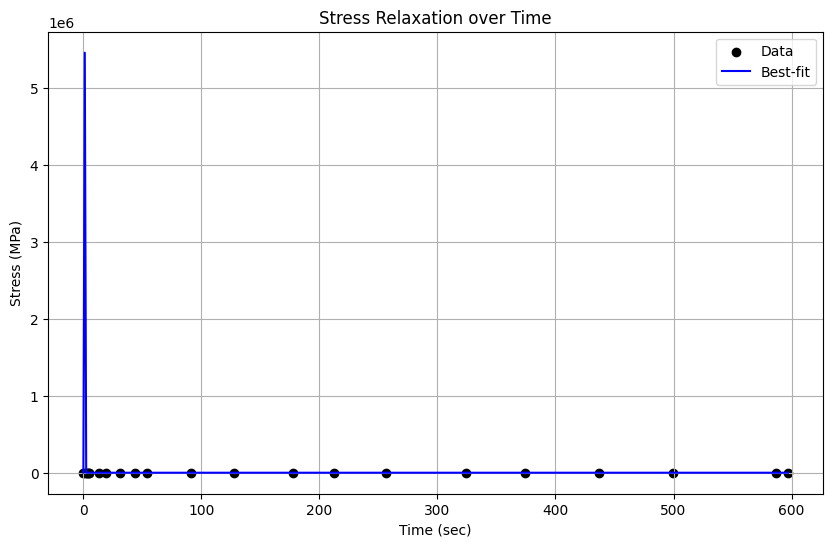

'Tried debugging this plot, I am aware it looks incorrect.'

In [19]:
#Part d
smooth_time = np.linspace(time.min(), time.max(), 500)
smooth_stress = np.dot(np.column_stack((np.exp(-smooth_time/tau[0]), np.exp(-smooth_time/tau[1]),
                                        np.exp(-smooth_time/tau[2]), np.exp(-smooth_time/tau[3]),
                                        np.ones_like(smooth_time))), coefficients)

plt.figure(figsize=(10, 6))
plt.scatter(time, stress, label='Data', color='black')
plt.plot(smooth_time, smooth_stress, label='Best-fit', color='blue')
plt.title('Stress Relaxation over Time')
plt.xlabel('Time (sec)')
plt.ylabel('Stress (MPa)')
plt.legend()
plt.grid(True)
plt.show()

'''Tried debugging this plot, I am aware it looks incorrect.'''

3. Load the '../data/primary-energy-consumption-by-region.csv' that has the energy consumption of different regions of the world from 1965 until 2018 [Our world in Data](https://ourworldindata.org/energy). 
You are going to compare the energy consumption of the United States to all of Europe. Load the data into a pandas dataframe. *Note: you can get certain rows of the data frame by specifying what you're looking for e.g. 
`EUR = dataframe[dataframe['Entity']=='Europe']` will give us all the rows from Europe's energy consumption.*

a. Use a piecewise least-squares regression to find a function for the energy consumption as a function of year

energy consumed = $f(t) = At+B+C(t-1970)H(t-1970)$

c. What is your prediction for US energy use in 2025? How about European energy use in 2025?

In [20]:
#Part a
data = pd.read_csv('../data/primary-energy-consumption-by-region.csv')
data = pd.DataFrame(data)
US = data[data['Entity']=='United States']
EURO = data[data['Entity']=='Europe']

x_US = US['Year'].values
y_US = US['Primary Energy Consumption (terawatt-hours)'].values
x_EURO = EURO['Year'].values
y_EURO = EURO['Primary Energy Consumption (terawatt-hours)'].values



def least_squares_fit(x, y):
    X = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq(X, y, rcond=None)[0]

#US
coeff_US = least_squares_fit(x_US, y_US)

#Europe
coeff_EURO = least_squares_fit(x_EURO, y_EURO)

print("US function slope and intercept: ",coeff_US)
print("EURO function slope and intercept: ",coeff_EURO)

US function slope and intercept:  [ 2.00397832e+02 -3.76521141e+05]
EURO function slope and intercept:  [ 1.99620397e+02 -3.75985956e+05]


In [21]:
#Part c (b?)

def predict(x, coeff):
    return coeff[0] * x + coeff[1]

# Predictions for 2025 for both US and Europe using the least-squares regression model
predicted_US_2025_ls = predict(2025, coeff_US)
predicted_EURO_2025_ls = predict(2025, coeff_EURO)

print("Predicted 2025 US energy use: ",predicted_US_2025_ls)
print("Predicted 2025 EURO energy use: ",predicted_EUR_2025_ls)

Predicted 2025 US energy use:  29284.468724693055


NameError: name 'predicted_EUR_2025_ls' is not defined